# Dataset exploration

The goal of this part is to explore the dataset. 

## 0. Load libraries and usefull functions

In [30]:
from pathlib import Path
import sys, os
sys.path.append(os.path.abspath("../src"))

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from collections import Counter

from cadot.utils.path import get_data_path, add_src_to_sys_path
add_src_to_sys_path()
from cadot.data.loading import load_yolo_annotations
from cadot.data.loading import get_image_label_pairs
from cadot.data.visualisation import plot_image_with_annotations

In [31]:
path_data = get_data_path()
print(path_data)
split = 'train' # choose 'train' or 'valid'
images_paths = sorted((path_data / "images" / split).glob("*.jpg"))

classes = ['Basketball Field', 'Building', 'Crosswalk', 'Football Field',
           'Graveyard', 'Large Vehicle', 'Medium Vehicle', 'Playground',
           'Roundabout', 'Ship', 'Small Vehicle', 'Swimming Pool',
           'Tennis Court', 'Train'
           ]

/Users/karelmetaireau/projet_deep_learning/material-acceleration/DataCadot_yolo


## 1. Explore classes

In [32]:
category_counts = Counter()
all_label_paths = sorted((path_data / "labels" / split).glob("*.txt"))

for label_path in all_label_paths:
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                class_id = int(parts[0])
                class_name = classes[class_id] if class_id < len(classes) else f"class_{class_id}"
                category_counts[class_name] += 1

In [33]:
# Print statistics
print(f"\nDataCadot dataset statistics ({split.capitalize()} split):")
print(f"Total images: {len(images_paths)}")
print(f"Total label files: {len(all_label_paths)}")

print(f"\nCategory distribution in {split.capitalize()} set:")
if category_counts:
    for class_name, count in sorted(category_counts.items()):
        print(f"  {class_name}: {count}")
else:
    print(f"  No annotations found")

print(f"\nTotal annotations: {sum(category_counts.values())}")



DataCadot dataset statistics (Train split):
Total images: 3234
Total label files: 3234

Category distribution in Train set:
  Basketball Field: 15
  Building: 30764
  Crosswalk: 3751
  Football Field: 77
  Graveyard: 130
  Large Vehicle: 841
  Medium Vehicle: 3865
  Playground: 44
  Roundabout: 37
  Ship: 300
  Small Vehicle: 35149
  Swimming Pool: 60
  Tennis Court: 98
  Train: 67

Total annotations: 75198


## 2. Inspect dataset

We plot a sample of images and the bounding boxes with the class. We plot only a few images of the dataset. 

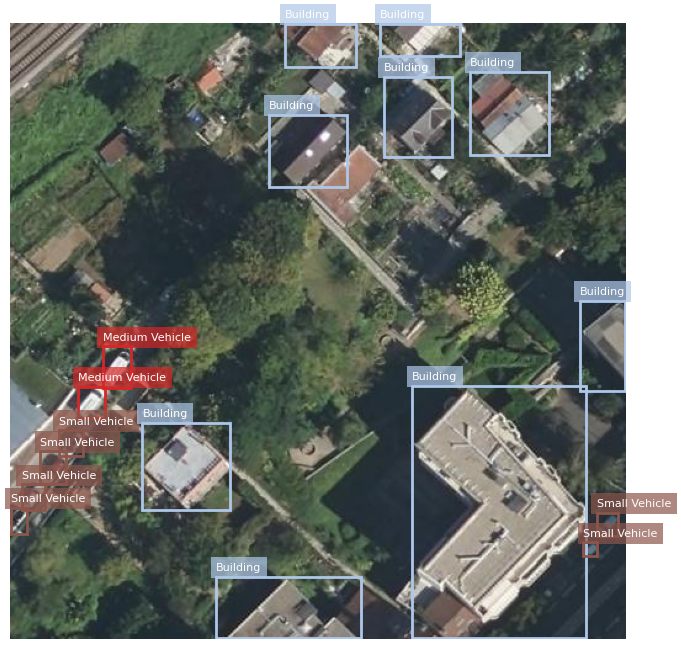

In [34]:
pairs = get_image_label_pairs("train")
img_path, label_path = pairs[0]

img = Image.open(img_path)
annotations = load_yolo_annotations(label_path, img.width, img.height)

plot_image_with_annotations(img, annotations, class_names=classes)

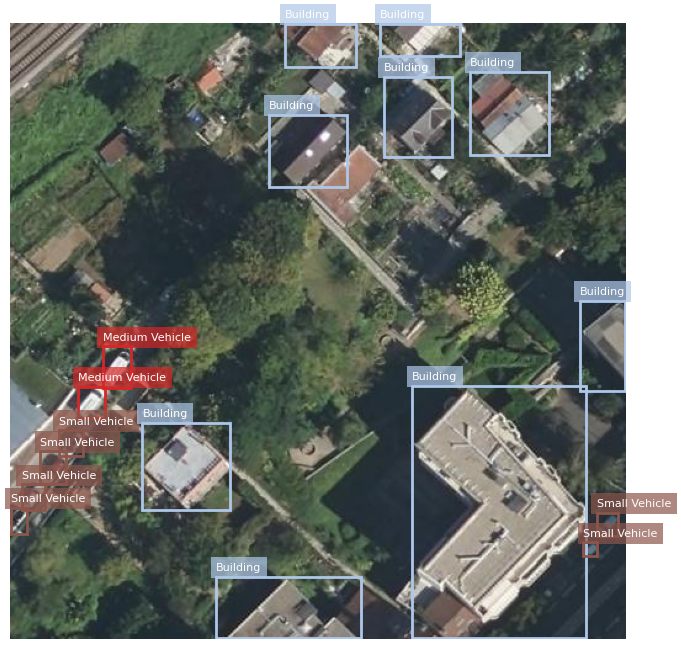

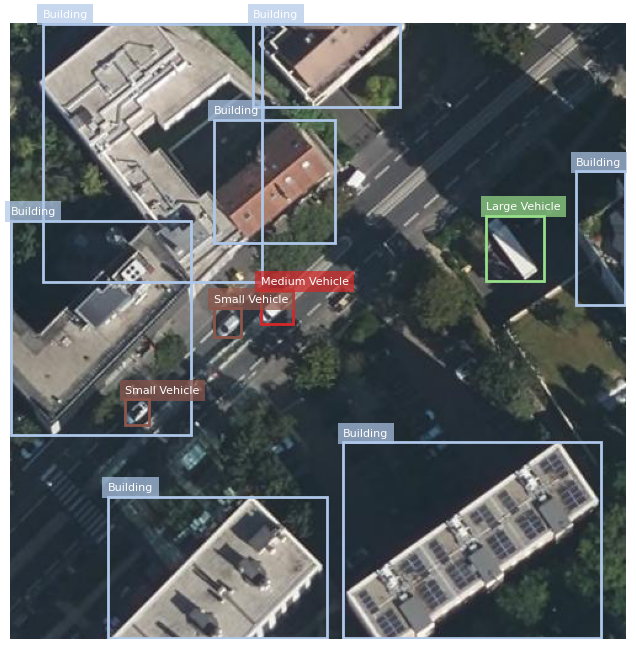

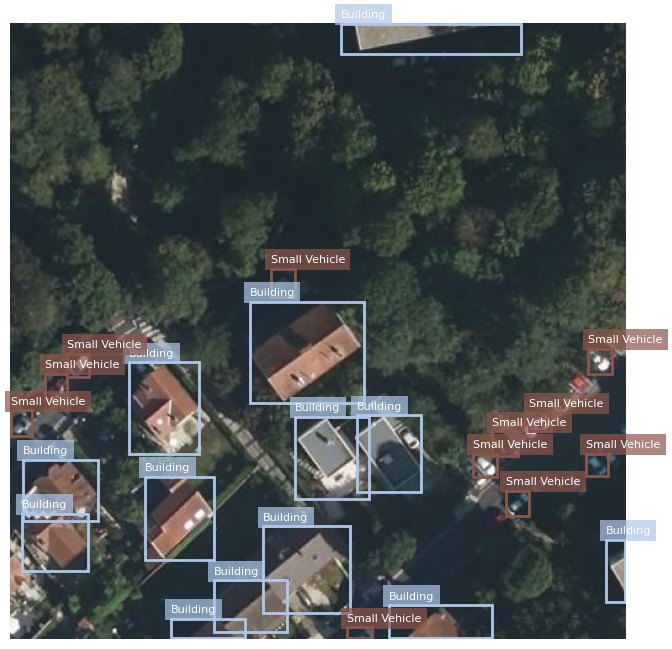

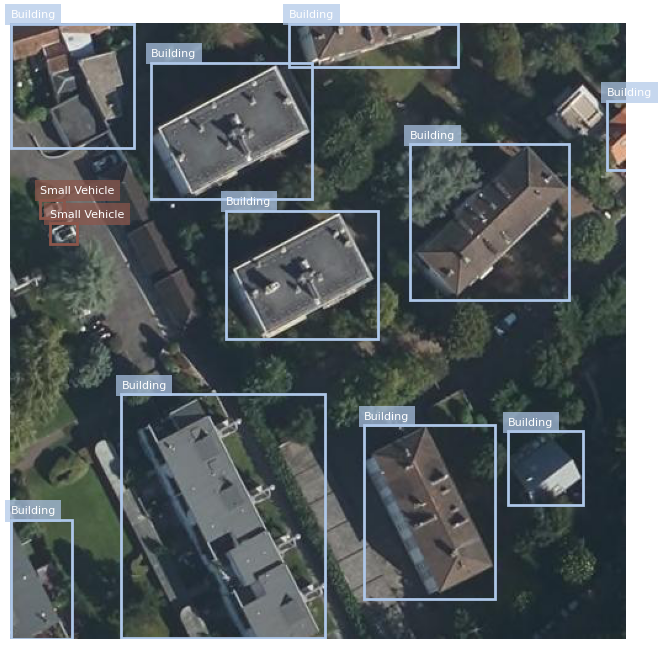

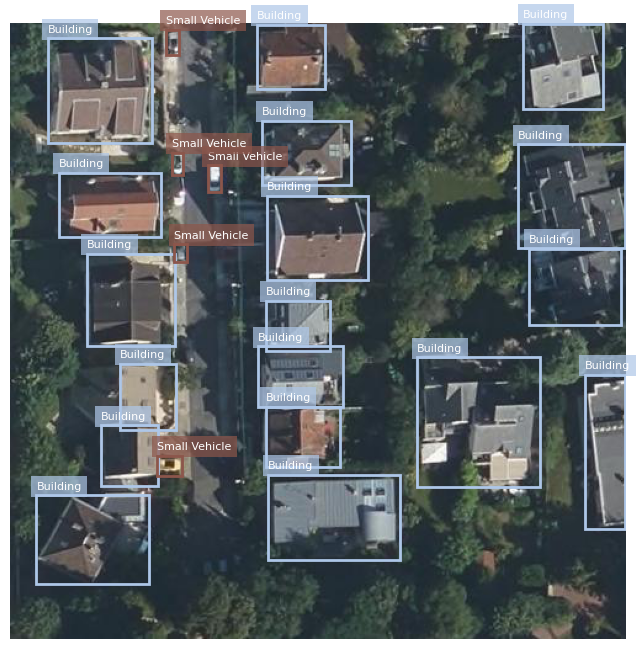

In [35]:
pairs_sample = get_image_label_pairs("train")[:5]

for img_path, label_path in pairs_sample:
    img = Image.open(img_path)
    annotations = load_yolo_annotations(label_path, img.width, img.height)
    plot_image_with_annotations(img, annotations, class_names=classes)